# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

In [3]:
# 1.3.1.2
# implement Linear Regression

# convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train.shape

# convert y_train and y_test to a column vector
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [4]:
# Class for Linear Regression
class LinearRegression:
    def __init__(self, x_train, y_train, x_test, y_test, lr=0.01):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.w = np.zeros((x_train.shape[1], 1))
        self.b = 0
        self.learning_rate = lr
        self.num_iterations = 10000
        self.costs = []
        
    def fit(self):
        m = self.x_train.shape[0]
        for i in range(self.num_iterations):
            # calculate y_hat
            y_hat = np.dot(self.x_train, self.w) + self.b
            # calculate cost
            cost = (1/(2*m)) * np.sum(np.square(y_hat - self.y_train))
            # calculate gradients
            dw = (1/m) * np.dot(self.x_train.T, (y_hat - self.y_train))
            db = (1/m) * np.sum(y_hat - self.y_train)
            # update weights and bias
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db
            # print(self.w.shape)
            # store cost
            self.costs.append(cost)

            # stop if cost is less than 0.0001
            if cost < 0.0001:
                break
            
    def predict(self, x):
        y_hat = np.dot(x, self.w) + self.b
        return y_hat
    
    def MSE(self):
        y_hat = self.predict(self.x_test)
        m = self.x_test.shape[0]
        mse = (1/m) * np.sum(np.square(y_hat - self.y_test))
        return mse

    def plot_train_error(self):
        plt.plot(self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Train Error')
        plt.title('Train Error vs Iterations')
        plt.show()

        
  

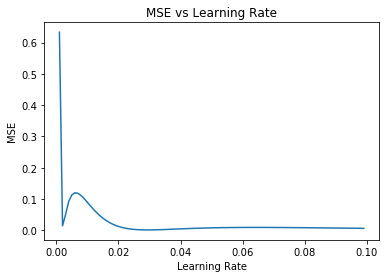

In [5]:
# 1.3.2.3
# try with different learning rates and choose the best one

# try learning rates from 0.001 to 0.1 with step size 0.001
learning_rates = np.arange(0.001, 0.1, 0.001)
# store MSE for each learning rate
MSEs = []
for lr in learning_rates:
    model = LinearRegression(x_train, y_train, x_test, y_test, lr)
    model.fit()
    MSEs.append(model.MSE())

# plot MSE vs learning rate
plt.plot(learning_rates, MSEs)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs Learning Rate')
plt.show()

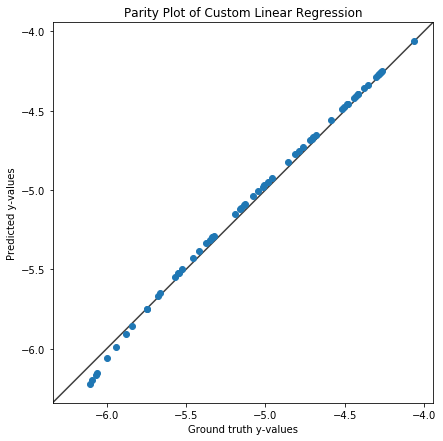

In [6]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

# fit the model with the best learning rate
model = LinearRegression(x_train, y_train, x_test, y_test, 0.03)
model.fit()
# get predictions
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

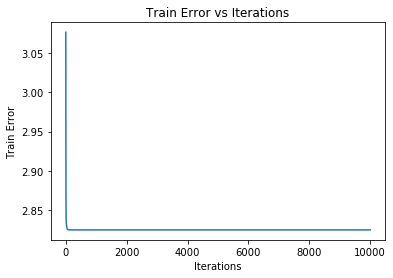

In [7]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.metrics import mean_squared_error

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

# Class for Ridge Regression
class RidgeRegression:
    def __init__(self, x_train, y_train, x_test, y_test, lr=0.03, alpha=0.1):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.w = np.zeros((x_train.shape[1], 1))
        self.b = 0
        self.learning_rate = lr
        self.num_iterations = 10000
        self.alpha = alpha
        self.costs = []
        
    def fit(self):
        m = self.x_train.shape[0]
        for i in range(self.num_iterations):
            # calculate y_hat
            y_hat = np.dot(self.x_train, self.w) + self.b
            # calculate cost
            cost = (1/(2*m)) * np.sum(np.square(y_hat - self.y_train)) + self.alpha * np.sum(np.square(self.w))
            # calculate gradients
            dw = (1/m) * np.dot(self.x_train.T, (y_hat - self.y_train)) + 2 * self.alpha * self.w
            db = (1/m) * np.sum(y_hat - self.y_train)
            # update weights and bias
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db
            # store cost
            self.costs.append(cost)

            # stop if cost is less than 0.0001
            if cost < 0.0001:
                break
            
    def predict(self, x):
        y_hat = np.dot(x, self.w) + self.b
        return y_hat
    
    def RMSE(self):
        y_hat = self.predict(self.x_test)
        m = self.x_test.shape[0]
        rmse = np.sqrt((1/m) * np.sum(np.square(y_hat - self.y_test)))
        return rmse

    def plot_train_error(self):
        plt.plot(self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Train Error')
        plt.title('Train Error vs Iterations')
        plt.show()
x=RidgeRegression(x_train, y_train, x_test, y_test, 0.03, 2.5)
x.fit()
x.plot_train_error()

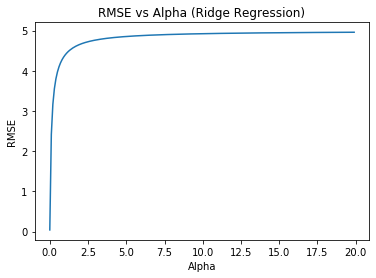

In [8]:
# try different values of alpha
from sklearn.metrics import mean_sq
# try alphas from 0 to 20 with step size 0.1
alphas = np.arange(0, 20, 0.1)
# store RMSE for each alpha
RMSEs = []
for alpha in alphas:
    model = RidgeRegression(x_train, y_train, x_test, y_test, 0.03, alpha)
    model.fit()
    RMSEs.append(model.RMSE())

# plot RMSE vs alpha
plt.plot(alphas, RMSEs)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha (Ridge Regression)')
plt.show()

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

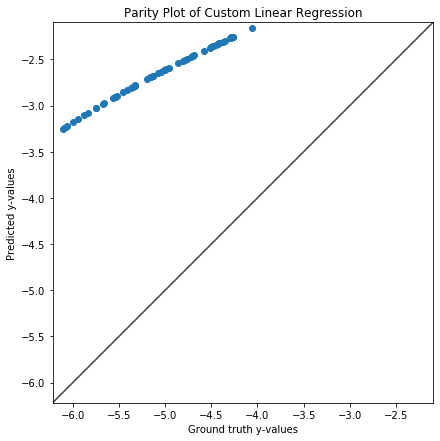

In [9]:
# 1.3.2.4

# Get the predictions of x_test into `y_pred`

# fit the model with the best learning rate
model = RidgeRegression(x_train, y_train, x_test, y_test, 0.03, 0.1)
model.fit()
# get predictions
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

In [10]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

# Class for Lasso Regression
class LassoRegression:
    def __init__(self, x_train, y_train, x_test, y_test, lr=0.03, alpha=0.1):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.w = np.zeros((x_train.shape[1], 1))
        self.b = 0
        self.learning_rate = lr
        self.num_iterations = 10000
        self.alpha = alpha
        self.costs = []
        
    def fit(self):
        m = self.x_train.shape[0]
        for i in range(self.num_iterations):
            # calculate y_hat
            y_hat = np.dot(self.x_train, self.w) + self.b
            # calculate cost
            cost = (1/(2*m)) * np.sum(np.square(y_hat - self.y_train)) + self.alpha * np.sum(np.abs(self.w))
            # calculate gradients
            dw = (1/m) * np.dot(self.x_train.T, (y_hat - self.y_train)) + self.alpha * np.sign(self.w)
            db = (1/m) * np.sum(y_hat - self.y_train)
            # update weights and bias
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db
            # store cost
            self.costs.append(cost)

            # stop if cost is less than 0.0001
            if cost < 0.0001:
                break
            
    def predict(self, x):
        y_hat = np.dot(x, self.w) + self.b
        return y_hat
    
    def RMSE(self):
        y_hat = self.predict(self.x_test)
        m = self.x_test.shape[0]
        rmse = np.sqrt((1/m) * np.sum(np.square(y_hat - self.y_test)))
        return rmse

    def plot_train_error(self):
        plt.plot(self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Train Error')
        plt.title('Train Error vs Iterations')
        plt.show()

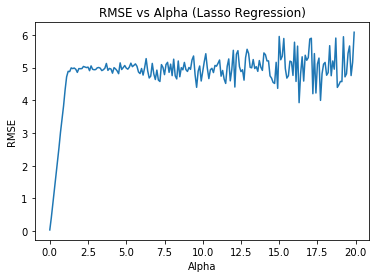

In [11]:
# try different values of alpha

# try alphas from 0 to 20 with step size 0.1
alphas = np.arange(0, 20, 0.1)
# store RMSE for each alpha
RMSEs = []
for alpha in alphas:
    model = LassoRegression(x_train, y_train, x_test, y_test, 0.03, alpha)
    model.fit()
    RMSEs.append(model.RMSE())

# plot RMSE vs alpha
plt.plot(alphas, RMSEs)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha (Lasso Regression)')
plt.show()

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

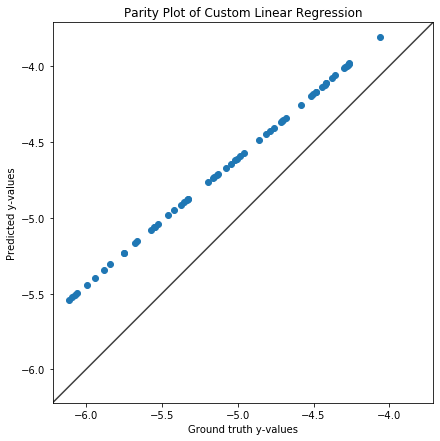

In [12]:
# 1.3.3.4

# Get the predictions of x_test into `y_pred`

# fit the model with the best learning rate
model = LassoRegression(x_train, y_train, x_test, y_test, 0.03, 0.1)
model.fit()
# get predictions
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()